In [13]:
import os
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import cv2 
import easyocr



In [3]:
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

Progress: |████----------------------------------------------| 10.0% Complete

Progress: |██████████████████████████------------------------| 52.5% Complete

Progress: |█████████████████████████████████████████████████-| 98.7% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [15]:
filePath = '/home/shared/DARPA/validation_shirui'
mapPath = os.path.join(filePath, 'AZ_PrescottNF.tif')
jsonPath = os.path.join(filePath, 'AZ_PrescottNF.json')

In [7]:
img = cv2.imread(filepath)

In [8]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# h,s,v = cv2.split(hsv)

lower_val = np.array([0,0,10])
upper_val = np.array([256,256,100])

# Threshold the HSV image to get only black colors
mask = cv2.inRange(hsv, lower_val, upper_val)

# invert the mask to get black letters on white background
res2 = cv2.bitwise_not(mask)

In [9]:
result = reader.readtext(res2[3000:4000, 3000:4000])

In [10]:
result

[([[57, 63], [120, 63], [120, 100], [57, 100]], 'Dm', 0.9992741398641504),
 ([[527, 171], [605, 171], [605, 207], [527, 207]],
  'Tso?',
  0.9999053478240967),
 ([[837, 167], [913, 167], [913, 205], [837, 205]], 'Tso?', 0.719925962967483),
 ([[721, 303], [787, 303], [787, 339], [721, 339]], 'Tbo', 0.9996643455093459),
 ([[327, 414], [396, 414], [396, 453], [327, 453]], 'QTs', 0.9982099942993489),
 ([[138, 536], [176, 536], [176, 568], [138, 568]], 'Ta', 0.9999844899949775),
 ([[635, 541], [797, 541], [797, 579], [635, 579]],
  'South Butte',
  0.7377048166958575),
 ([[483, 583], [543, 583], [543, 619], [483, 619]], 'Qal', 0.9999974534563641),
 ([[671, 583], [761, 583], [761, 621], [671, 621]],
  'pluton',
  0.9999894879180304),
 ([[965, 595], [983, 595], [983, 617], [965, 617]], 'b', 0.9888272595988248),
 ([[603, 603], [671, 603], [671, 639], [603, 639]], 'Xsb', 0.9999247740907423),
 ([[741, 659], [791, 659], [791, 697], [741, 697]], 'Xp', 0.999929194028732),
 ([[673, 757], [757, 757],

In [4]:
result = reader.readtext('testing_OCR.png')

In [ ]:
reader.get_textbox

In [5]:
result

[([[57, 63], [120, 63], [120, 100], [57, 100]], 'Dm', 0.9992741398641504),
 ([[527, 171], [605, 171], [605, 207], [527, 207]],
  'Tso?',
  0.9999053478240967),
 ([[837, 167], [913, 167], [913, 205], [837, 205]], 'Tso?', 0.719925962967483),
 ([[721, 303], [787, 303], [787, 339], [721, 339]], 'Tbo', 0.999674187121887),
 ([[327, 414], [396, 414], [396, 453], [327, 453]], 'QTs', 0.9982099942993489),
 ([[138, 536], [176, 536], [176, 568], [138, 568]], 'Ta', 0.9999838999418298),
 ([[635, 541], [797, 541], [797, 579], [635, 579]],
  'South Butte',
  0.7377048166958575),
 ([[483, 583], [543, 583], [543, 619], [483, 619]], 'Qal', 0.9999938057061831),
 ([[671, 583], [761, 583], [761, 621], [671, 621]],
  'pluton',
  0.9999894879180304),
 ([[965, 595], [983, 595], [983, 617], [965, 617]], 'b', 0.9888272595988248),
 ([[603, 603], [671, 603], [671, 639], [603, 639]], 'Xsb', 0.9999247740907423),
 ([[741, 659], [791, 659], [791, 697], [741, 697]], 'Xp', 0.9999345887177205),
 ([[673, 757], [757, 757],

In [3]:
img = cv2.imread(filepath)

## color filtering to leave only black pixel
#### https://pythonprogramming.net/color-filter-python-opencv-tutorial/

In [22]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# h,s,v = cv2.split(hsv)

lower_val = np.array([0,0,10])
upper_val = np.array([256,256,100])

# Threshold the HSV image to get only black colors
mask = cv2.inRange(hsv, lower_val, upper_val)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)
# invert the mask to get black letters on white background
res2 = cv2.bitwise_not(mask)

subimage = res2[3000:4000, 3000:4000].copy()

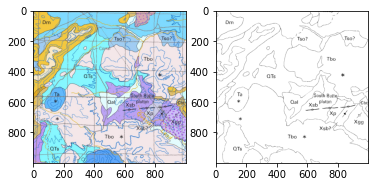

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.imshow(img[3000:4000, 3000:4000])

plt.subplot(1,2,2)
plt.imshow(res2[3000:4000, 3000:4000], cmap='gray')

plt.show()

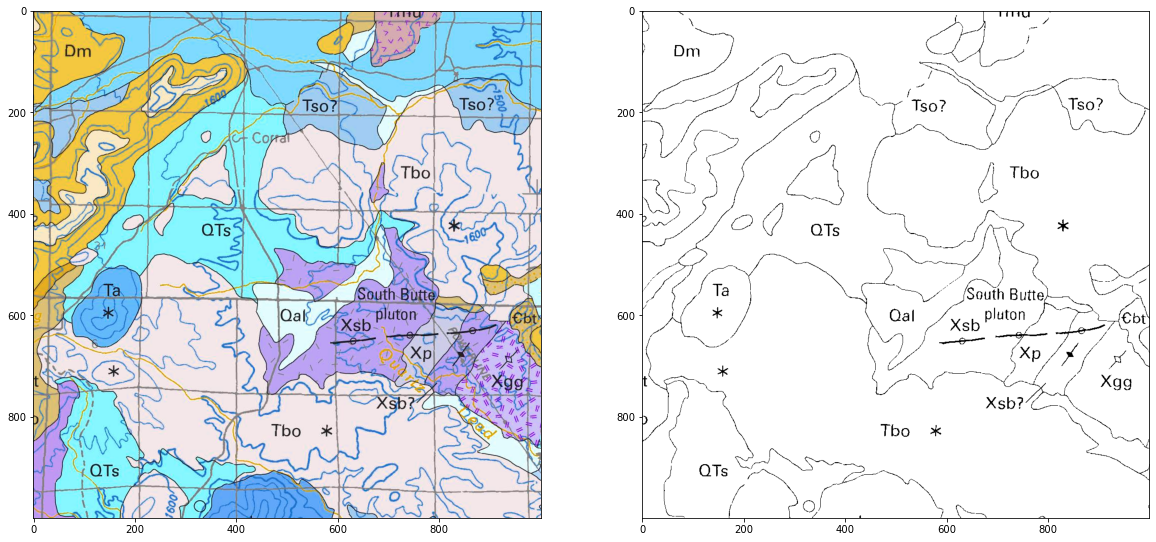

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.imshow(img[3000:4000, 3000:4000])

plt.subplot(1,2,2)
plt.imshow(res2[3000:4000, 3000:4000], cmap='gray')

plt.show()

In [22]:
custom_config = r'--oem 3 --psm 12'
#pytesseract.image_to_string(res2[3000:4000, 3000:4000], config=custom_config)

In [29]:
subimage = cv2.imread('testing_OCR.png') #[600:800, 600:800]

In [30]:
subimage.shape

(1000, 1000, 3)

In [27]:
box = pytesseract.image_to_data(subimage, output_type=Output.DICT, config=custom_config)

In [28]:
box['text']

['', '', '', '', 'xsb2Z']

46 Tbo
58 QTs
105 Xgg


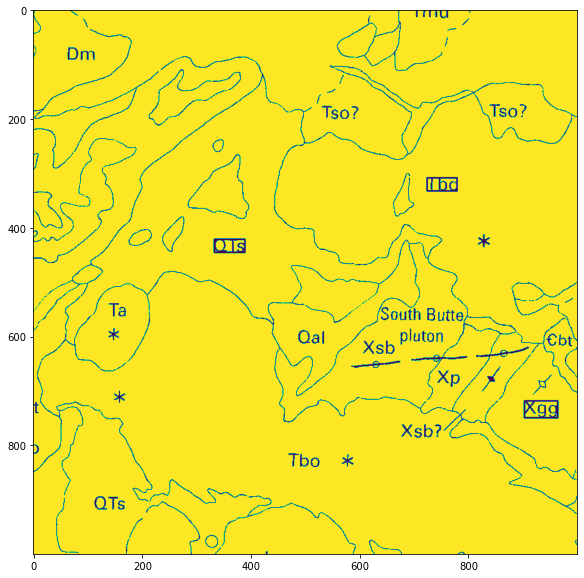

In [26]:
n_boxes = len(box['level'])
for i in range(n_boxes):
    for legendname in ['Dm', 'Tso', 'Tbo', 'QTs', 'Xgg', 'Xsb', 'Qal', 'Ta']:
        if legendname in box['text'][i]:
            print(i, box['text'][i])
            (x, y, w, h) = (box['left'][i], box['top'][i], box['width'][i], box['height'][i])
            cv2.rectangle(subimage, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(subimage, )

In [27]:
box['text']

['',
 '',
 '',
 '',
 'mn',
 '',
 '',
 '',
 'Lo',
 '',
 '',
 '',
 'oe',
 '',
 '',
 '',
 'Lo.',
 '',
 '',
 '',
 'AD',
 '',
 '',
 '',
 'foo™',
 '',
 '',
 '',
 'ye',
 '?',
 '',
 '',
 '',
 'pp',
 '',
 '',
 '',
 'el',
 '',
 '',
 '',
 'a',
 '',
 '',
 '',
 'Si',
 'Tbo',
 '',
 '',
 '',
 'Wor',
 '',
 '',
 '',
 '©',
 '',
 '',
 '',
 'QTs',
 '',
 '',
 '',
 '*',
 '',
 '',
 '',
 'aa',
 '',
 '',
 '',
 'outh',
 'Bute',
 '',
 '',
 '',
 '(ay',
 '',
 '',
 '',
 'pluton,',
 '',
 '',
 '',
 'TO',
 '6',
 '',
 '',
 '',
 'Ao)',
 '',
 '',
 '',
 'va',
 '',
 '',
 '',
 'YY',
 '',
 '',
 '',
 'Fe,',
 'aT',
 '',
 '',
 '',
 'Xgg',
 '',
 '',
 '',
 '(',
 '',
 '',
 '',
 'xeon',
 'Cc',
 'SN',
 '',
 '',
 '',
 'af',
 '',
 '',
 '',
 'Tho',
 'x*',
 '',
 '',
 '',
 'J)',
 'OTs',
 '~~',
 '',
 '',
 '',
 'Son,',
 '',
 '',
 '',
 'of',
 'Nw']

In [ ]:
img = cv2.imread('testing_OCR.png')
h, w, _ = img.shape # assumes color image
# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img) # also include any config options you use

# draw the bounding boxes on the image
for b in boxes.splitlines():
    print(b)
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# show annotated image and wait for keypress
plt.imshow( img)

In [ ]:
boxes

In [ ]:
# import easyocr
# reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
# result = reader.readtext('testing_OCR.png')

In [ ]:
subimage = img[3000:4000, 3000:4000,:]
gray_image = cv2.cvtColor(subimage, cv2.COLOR_BGR2GRAY)
# perform threshold
retr , thresh = cv2.threshold(gray_image, 190, 255, cv2.THRESH_BINARY_INV)

contours,_ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# create emtpy mask
mask = np.zeros(subimage.shape, dtype=subimage.dtype)

# draw all contours larger than 20 on the mask
for c in contours:
    if cv2.contourArea(c) > 10:
        x, y, w, h = cv2.boundingRect(c)
        cv2.drawContours(mask, [c], 0, (255), -1)
        
# apply the mask to the original image
result = cv2.bitwise_and(subimage,subimage, mask= mask)

In [ ]:
contours[0].shape

In [ ]:
plt.imshow(res2[3280:3380, 3700:3800])

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 